In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

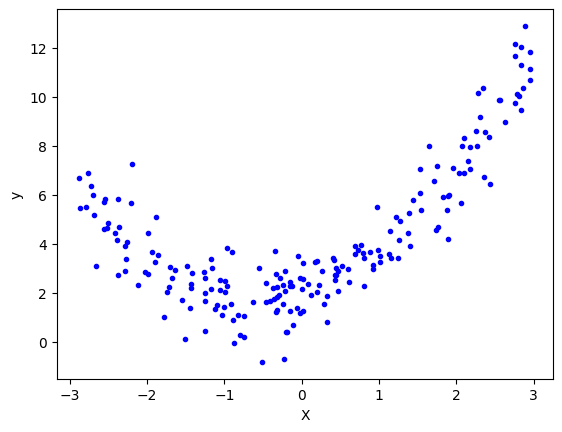

In [4]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
# Applying linear regression
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.44421540286791084

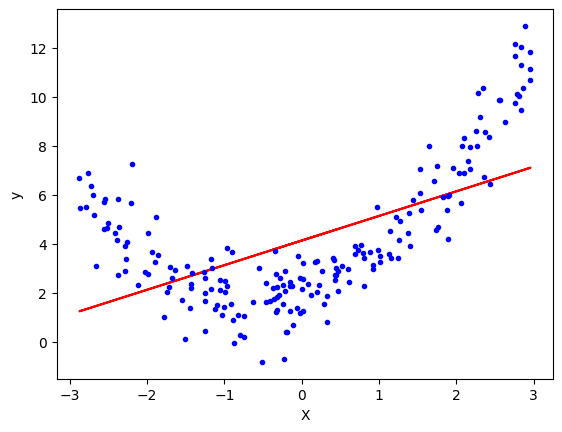

In [9]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [12]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=False)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [13]:
print(X_train[0])
print(X_train_trans[0])

[-0.36549933]
[-0.36549933  0.13358976]


In [11]:
# include_bias parameter

In [14]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = lr.predict(X_test_trans)

In [16]:
r2_score(y_test,y_pred)

0.8635568893316443

In [17]:
print(lr.coef_)
print(lr.intercept_)

[[0.86687882 0.79434243]]
[1.97095639]


In [18]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
print(X_new)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

[[-3.        ]
 [-2.96984925]
 [-2.93969849]
 [-2.90954774]
 [-2.87939698]
 [-2.84924623]
 [-2.81909548]
 [-2.78894472]
 [-2.75879397]
 [-2.72864322]
 [-2.69849246]
 [-2.66834171]
 [-2.63819095]
 [-2.6080402 ]
 [-2.57788945]
 [-2.54773869]
 [-2.51758794]
 [-2.48743719]
 [-2.45728643]
 [-2.42713568]
 [-2.39698492]
 [-2.36683417]
 [-2.33668342]
 [-2.30653266]
 [-2.27638191]
 [-2.24623116]
 [-2.2160804 ]
 [-2.18592965]
 [-2.15577889]
 [-2.12562814]
 [-2.09547739]
 [-2.06532663]
 [-2.03517588]
 [-2.00502513]
 [-1.97487437]
 [-1.94472362]
 [-1.91457286]
 [-1.88442211]
 [-1.85427136]
 [-1.8241206 ]
 [-1.79396985]
 [-1.7638191 ]
 [-1.73366834]
 [-1.70351759]
 [-1.67336683]
 [-1.64321608]
 [-1.61306533]
 [-1.58291457]
 [-1.55276382]
 [-1.52261307]
 [-1.49246231]
 [-1.46231156]
 [-1.4321608 ]
 [-1.40201005]
 [-1.3718593 ]
 [-1.34170854]
 [-1.31155779]
 [-1.28140704]
 [-1.25125628]
 [-1.22110553]
 [-1.19095477]
 [-1.16080402]
 [-1.13065327]
 [-1.10050251]
 [-1.07035176]
 [-1.04020101]
 [-1.01005

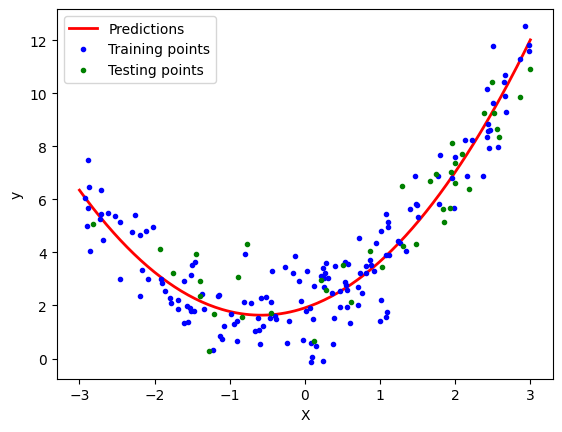

In [19]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [19]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

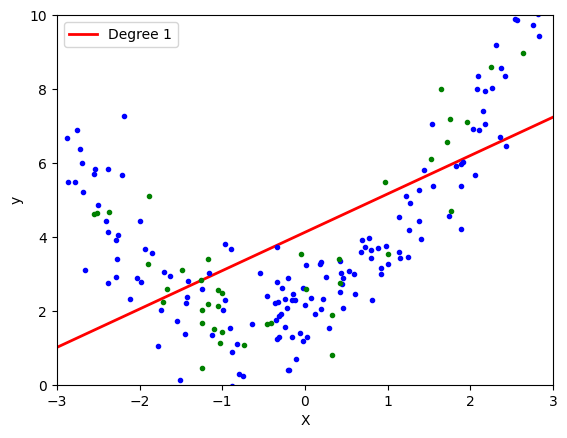

In [26]:
polynomial_regression(1)

In [20]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


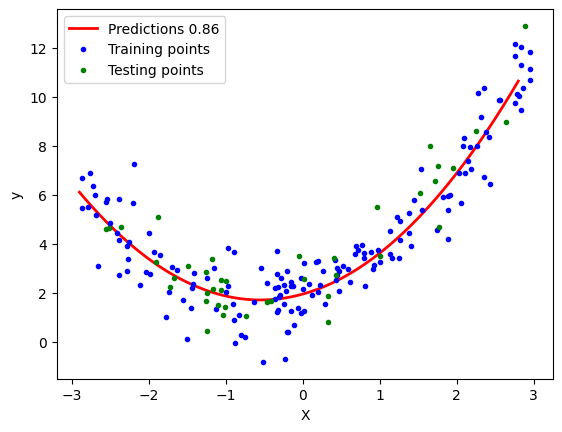

In [27]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()